# 1. DB에서 데이터 불러오기

In [1]:
import bw_database
import bw_class
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

In [2]:
bw_database.csv2db()

csv to db


# 2. 대시보드를 위해 필요한 데이터프레임 만들기

In [3]:
train = bw_database.making_dataframe_train_db('train_table')
test = bw_database.making_dataframe_test_db('test_table')

In [4]:
# bw_class 적용1 -> rfm 변수를 제외한 필요한 변수 생성
bw = bw_class.bw_preprocessing(train)
bw.apply_my_function()
bw_df = bw.return_dataframe()
bw_df

,rowid,IND,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,...,GST,오프라인비용,온라인비용,마케팅비용,고객소비액,매출,처음거래날짜,마지막거래날짜,거래날차이,재방문여부
0,1,0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,...,0.10,4500,2424.50,6924.50,158.6729,153.71,2019-01-01,2019-01-26,25 days,1
1,2,1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,...,0.10,4500,2424.50,6924.50,158.6729,153.71,2019-01-01,2019-01-26,25 days,1
2,3,2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,...,0.10,4500,2424.50,6924.50,8.5295,2.05,2019-01-01,2019-01-26,25 days,1
3,4,3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,...,0.18,4500,2424.50,6924.50,109.9270,87.65,2019-01-01,2019-01-26,25 days,1
4,5,4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,...,0.18,4500,2424.50,6924.50,24.0230,16.50,2019-01-01,2019-01-26,25 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44456,44457,44456,USER_0035,Transaction_20090,2019-10-31,Product_0989,Nest-USA,2,149.00,6.00,...,0.10,2000,1251.87,3251.87,333.8000,298.00,2019-03-06,2019-10-31,239 days,1
44457,44458,44457,USER_0035,Transaction_20091,2019-10-31,Product_0981,Nest-USA,1,149.00,6.00,...,0.10,2000,1251.87,3251.87,153.5100,149.00,2019-03-06,2019-10-31,239 days,1
44458,44459,44458,USER_0035,Transaction_20092,2019-10-31,Product_0990,Nest,1,199.00,19.99,...,0.05,2000,1251.87,3251.87,208.0450,199.00,2019-03-06,2019-10-31,239 days,1
44459,44460,44459,USER_0035,Transaction_20093,2019-10-31,Product_0992,Nest,1,99.00,6.00,...,0.05,2000,1251.87,3251.87,109.9500,99.00,2019-03-06,2019-10-31,239 days,1


In [5]:
# bw_class 적용1 -> rfm 변수를 제외한 필요한 변수 생성
bw = bw_class.bw_preprocessing(train)
bw.apply_my_function()
bw_df = bw.return_dataframe()

In [6]:
# bw_class 적용2 -> rfm 변수 및 고객분류 변수 생성
processor = bw_class.RFMProcessor(train)
rfm_without_outliers, rfm_outliers, rfm_without_outliers_log, X_scaled = processor.process_data()

In [7]:
# 적용
processor = bw_class.RFMProcessor(train) 
rfm_without_outliers, rfm_outliers, rfm_without_outliers_log, X_scaled = processor.process_data()
processor.fit_clustering(X_scaled, n_clusters=4)
new_data_predictions = processor.predict(train)

### 시각화 자료를 통해 bw_class로 이동하여 각 클러스터에 대한 고객분류명 변경가능

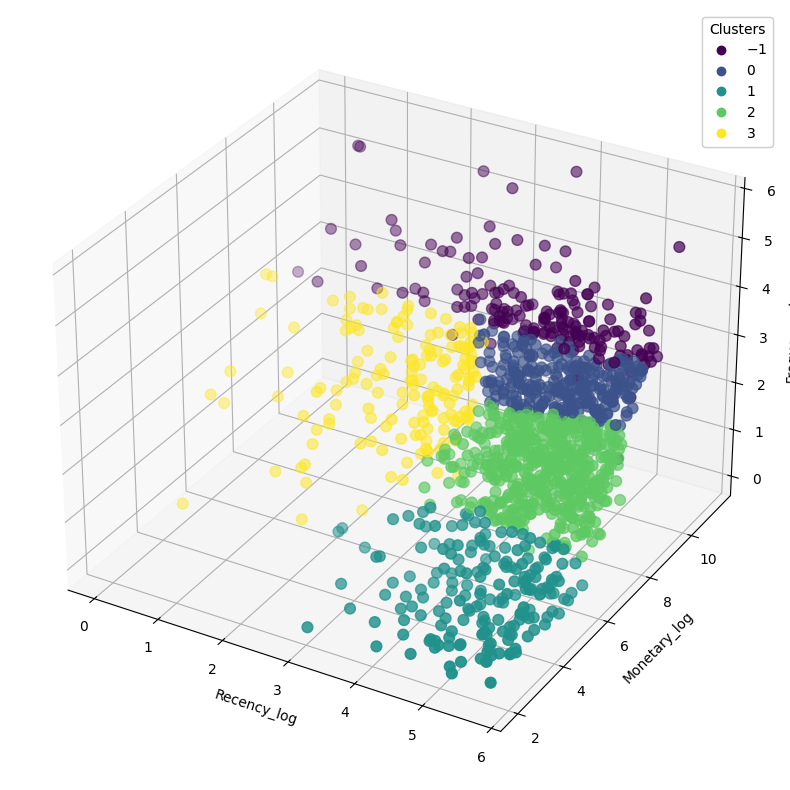

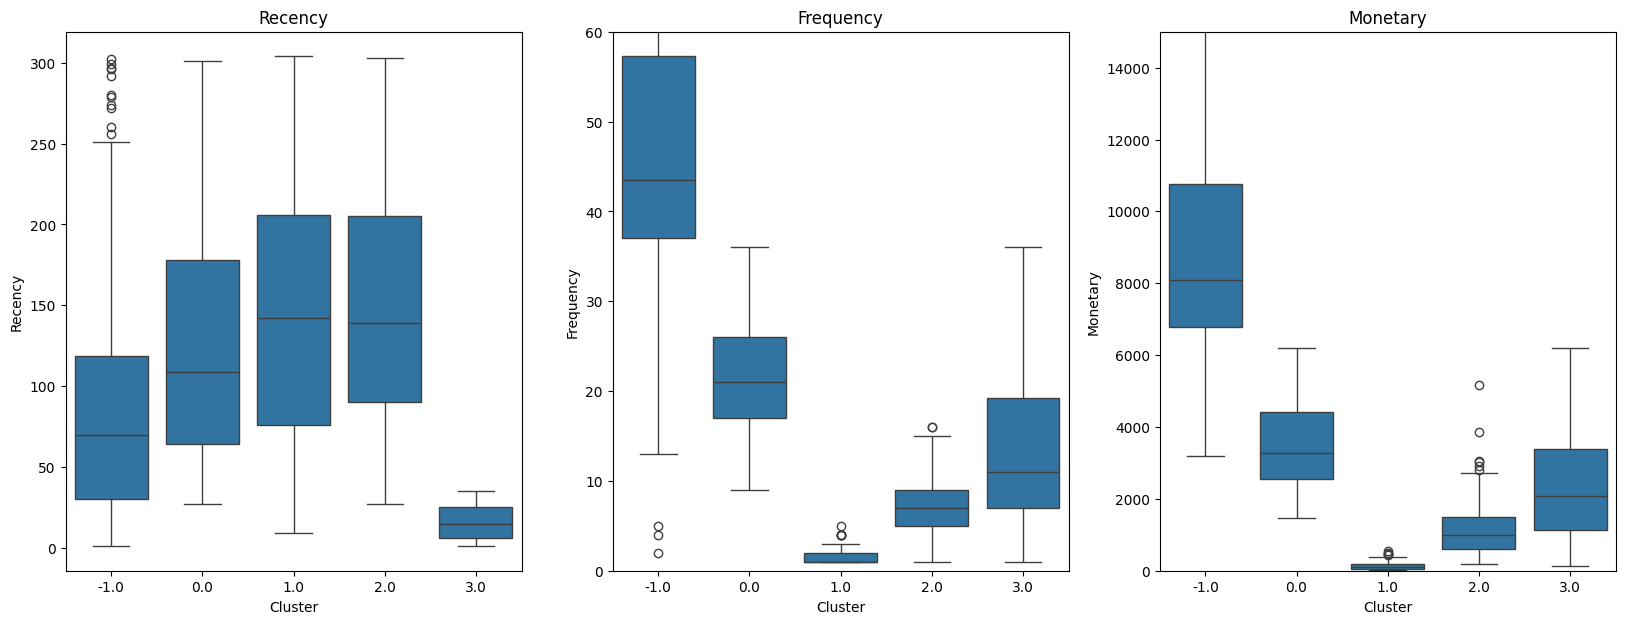

In [8]:
# 클러스터 시각화 -> 이후에 새로운 데이터가 들어왔을 때 계속 점검할 수 있게끔
visualization = bw_class.Visualization(new_data_predictions)
visualization.plot_clusters(new_data_predictions["Cluster"])
visualization.plot_boxplots()

In [9]:
# 최종 데이터에 join
cluster_data = bw_class.mapping_cluster(new_data_predictions)
cluster = cluster_data[['고객ID','Recency','Frequency','Monetary','고객분류']]
train_bw = bw_df.merge(cluster, on = '고객ID', how = 'left')
train_bw

,rowid,IND,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,...,고객소비액,매출,처음거래날짜,마지막거래날짜,거래날차이,재방문여부,Recency,Frequency,Monetary,고객분류
0,1,0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,...,158.6729,153.71,2019-01-01,2019-01-26,25 days,1,279,177,37847.29341,VIP고객
1,2,1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,...,158.6729,153.71,2019-01-01,2019-01-26,25 days,1,279,177,37847.29341,VIP고객
2,3,2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,...,8.5295,2.05,2019-01-01,2019-01-26,25 days,1,279,177,37847.29341,VIP고객
3,4,3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,...,109.9270,87.65,2019-01-01,2019-01-26,25 days,1,279,177,37847.29341,VIP고객
4,5,4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,...,24.0230,16.50,2019-01-01,2019-01-26,25 days,1,279,177,37847.29341,VIP고객
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44456,44457,44456,USER_0035,Transaction_20090,2019-10-31,Product_0989,Nest-USA,2,149.00,6.00,...,333.8000,298.00,2019-03-06,2019-10-31,239 days,1,1,25,6204.83896,관심고객
44457,44458,44457,USER_0035,Transaction_20091,2019-10-31,Product_0981,Nest-USA,1,149.00,6.00,...,153.5100,149.00,2019-03-06,2019-10-31,239 days,1,1,25,6204.83896,관심고객
44458,44459,44458,USER_0035,Transaction_20092,2019-10-31,Product_0990,Nest,1,199.00,19.99,...,208.0450,199.00,2019-03-06,2019-10-31,239 days,1,1,25,6204.83896,관심고객
44459,44460,44459,USER_0035,Transaction_20093,2019-10-31,Product_0992,Nest,1,99.00,6.00,...,109.9500,99.00,2019-03-06,2019-10-31,239 days,1,1,25,6204.83896,관심고객


In [10]:
# 만들어진 최종 데이터프레임 -> DB에 저장
bw_database.create_new_table(train_bw, 'train_bw')



Existing table 'train_bw' dropped, and new table is created


# 3. 1번째 대시보드를 위한 데이터프레임 만들기

In [27]:
train_bw = bw_database.making_dataframe_our_db('train_bw')

In [30]:
# class 이용
rfm_clusters = train_bw[['고객ID', 'Recency', 'Frequency', 'Monetary', '고객분류']].drop_duplicates(subset=['고객ID'])
analysis = bw_class.first_dash(rfm_clusters)
rfm_clusters_final = analysis.get_final_dataframe()
rfm_clusters_final.reset_index(drop=True, inplace=True)
rfm_clusters_final

,고객분류,매출 비율,Recency,Frequency,Monetary,고객수,매출,고객수 비율
0,VIP고객,50.0%,92.0,54.0,10760.0,176,1.893684e+06,14.0%
1,관심고객,10.0%,16.0,14.0,2340.0,156,3.649696e+05,12.0%
2,우수고객,25.0%,128.0,22.0,3522.0,273,9.616270e+05,21.0%
3,이탈고객,1.0%,145.0,2.0,134.0,192,2.581134e+04,15.0%
4,잠재고객,15.0%,151.0,7.0,1113.0,497,5.529877e+05,38.0%


In [31]:
rfm_clusters

,고객ID,Recency,Frequency,Monetary,고객분류
0,USER_1358,279,177,37847.29341,VIP고객
9,USER_0190,92,7,1054.83270,잠재고객
26,USER_0066,91,15,2987.77264,우수고객
46,USER_0345,304,1,7.81688,이탈고객
65,USER_0683,63,6,904.97624,잠재고객
...,...,...,...,...,...
44155,USER_0368,2,5,1173.18744,관심고객
44164,USER_1166,2,7,1798.28808,관심고객
44363,USER_0565,1,1,123.81000,관심고객
44364,USER_0464,1,4,745.40238,관심고객


# 4. 두번째 대시보드를 위한 데이터프레임 만들기

In [32]:
train_bw

,rowid,IND,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,...,고객소비액,매출,처음거래날짜,마지막거래날짜,거래날차이,재방문여부,Recency,Frequency,Monetary,고객분류
0,1,0,USER_1358,Transaction_0000,2019-01-01 00:00:00,Product_0981,Nest-USA,1,153.71,6.50,...,158.6729,153.71,2019-01-01 00:00:00,2019-01-26 00:00:00,25 days,1,279,177,37847.29341,VIP고객
1,2,1,USER_1358,Transaction_0001,2019-01-01 00:00:00,Product_0981,Nest-USA,1,153.71,6.50,...,158.6729,153.71,2019-01-01 00:00:00,2019-01-26 00:00:00,25 days,1,279,177,37847.29341,VIP고객
2,3,2,USER_1358,Transaction_0002,2019-01-01 00:00:00,Product_0904,Office,1,2.05,6.50,...,8.5295,2.05,2019-01-01 00:00:00,2019-01-26 00:00:00,25 days,1,279,177,37847.29341,VIP고객
3,4,3,USER_1358,Transaction_0003,2019-01-01 00:00:00,Product_0203,Apparel,5,17.53,6.50,...,109.9270,87.65,2019-01-01 00:00:00,2019-01-26 00:00:00,25 days,1,279,177,37847.29341,VIP고객
4,5,4,USER_1358,Transaction_0003,2019-01-01 00:00:00,Product_0848,Bags,1,16.50,6.50,...,24.0230,16.50,2019-01-01 00:00:00,2019-01-26 00:00:00,25 days,1,279,177,37847.29341,VIP고객
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44456,44457,44456,USER_0035,Transaction_20090,2019-10-31 00:00:00,Product_0989,Nest-USA,2,149.00,6.00,...,333.8000,298.00,2019-03-06 00:00:00,2019-10-31 00:00:00,239 days,1,1,25,6204.83896,관심고객
44457,44458,44457,USER_0035,Transaction_20091,2019-10-31 00:00:00,Product_0981,Nest-USA,1,149.00,6.00,...,153.5100,149.00,2019-03-06 00:00:00,2019-10-31 00:00:00,239 days,1,1,25,6204.83896,관심고객
44458,44459,44458,USER_0035,Transaction_20092,2019-10-31 00:00:00,Product_0990,Nest,1,199.00,19.99,...,208.0450,199.00,2019-03-06 00:00:00,2019-10-31 00:00:00,239 days,1,1,25,6204.83896,관심고객
44459,44460,44459,USER_0035,Transaction_20093,2019-10-31 00:00:00,Product_0992,Nest,1,99.00,6.00,...,109.9500,99.00,2019-03-06 00:00:00,2019-10-31 00:00:00,239 days,1,1,25,6204.83896,관심고객


# 5. 3번째 대시보드를 위한 데이터프레임 만들기

In [35]:
# class 이용
clustered_summary = bw_class.thrid_dash(train_bw)
clustered_summary.create_clustered_summary()

monthly_clustered_customers = clustered_summary.get_monthly_clustered_customers()
monthly_clustered_monetary = clustered_summary.get_monthly_clustered_monetary()

monthly_clustered_customers.reset_index(drop=True, inplace=True)
monthly_clustered_monetary.reset_index(drop=True, inplace=True)
monthly_clustered_customers

고객분류,VIP고객,관심고객,우수고객,이탈고객,잠재고객,total,month
0,38,15,51,23,88,215,1
1,40,7,33,4,25,109,2
2,46,17,52,18,75,208,3
3,45,10,49,37,83,224,4
4,57,16,53,18,56,200,5
5,39,34,55,23,108,259,6
6,66,17,48,26,79,236,7
7,55,36,75,32,102,300,8
8,46,22,55,25,45,193,9
9,46,147,5,9,3,210,10


In [36]:
monthly_clustered_monetary

고객분류,VIP고객,관심고객,우수고객,이탈고객,잠재고객,total,month
0,183021.40,14329.45,113535.56,2405.70,90332.47,403624.58,1
1,194509.39,6784.57,91112.42,656.41,17757.01,310819.80,2
2,140065.85,12555.43,129320.36,2069.72,65596.73,349608.09,3
3,244336.96,5226.69,85751.05,3856.01,62447.71,401618.42,4
4,164944.92,5752.47,94126.46,1551.26,41388.31,307763.42,5
5,100035.73,22189.31,101776.18,2254.53,94825.63,321081.38,6
6,229118.62,10562.30,86449.81,2041.08,44466.26,372638.07,7
7,170884.64,35284.98,120662.06,3329.55,71049.14,401210.37,8
8,179624.49,30351.64,111262.16,2536.36,36773.75,360548.40,9
9,196205.87,201722.17,9595.14,878.53,1279.57,409681.28,10


# 6. 4번째 대시보드를 위한 데이터프레임 만들기

In [37]:
# class 이용
grouped_df_processor = bw_class.fourth_dash(train_bw)
grouped_df_processor.preprocess()
grouped_df_processor.group_by_columns(['제품카테고리', '월', '쿠폰상태'], '매출')

grouped_df = grouped_df_processor.get_grouped_df()
grouped_df.reset_index(drop=True, inplace=True)
grouped_df

,제품카테고리,월,쿠폰상태,매출
0,Accessories,1,Clicked,51.57
1,Accessories,3,Clicked,59.99
2,Accessories,4,Clicked,116.97
3,Accessories,4,Used,49.99
4,Accessories,5,Clicked,13.59
...,...,...,...,...
514,Waze,9,Not Used,76.70
515,Waze,9,Used,40.69
516,Waze,10,Clicked,149.14
517,Waze,10,Not Used,160.44


# 7. 5번째 대시보드를 위한 데이터프레임 만들기

In [38]:
# 사용
coupon_sales_processor = bw_class.fifth_dash(train_bw)
coupon_sales_processor.preprocess()
coupon_sales_processor.calculate_coupon_sales()

coupon_sales = coupon_sales_processor.get_coupon_sales()
coupon_sales.reset_index(drop=True, inplace=True)
coupon_sales

,쿠폰코드,고객분류,제품카테고리,매출
0,ACC10,VIP고객,Accessories,2409.87
1,ACC10,관심고객,Accessories,284.08
2,ACC10,우수고객,Accessories,161.55
3,ACC10,잠재고객,Accessories,30.58
4,ACC20,VIP고객,Accessories,272.49
...,...,...,...,...
237,unknown,잠재고객,More Bags,160.52
238,unknown,관심고객,Google,144.93
239,unknown,이탈고객,More Bags,87.96
240,unknown,이탈고객,Backpacks,79.99


In [39]:
# 만들어진 최종 데이터프레임 -> DB에 저장
bw_database.create_new_table(rfm_clusters_final, 'rfm_clusters_final')
bw_database.create_new_table(train_bw, 'train_bw')
bw_database.create_new_table(monthly_clustered_customers, 'monthly_clustered_customers')
bw_database.create_new_table(monthly_clustered_monetary, 'monthly_clustered_monetary')
bw_database.create_new_table(grouped_df, 'grouped_df')
bw_database.create_new_table(coupon_sales, 'coupon_sales')



Existing table 'rfm_clusters_final' dropped, and new table is created


Existing table 'train_bw' dropped, and new table is created


Existing table 'monthly_clustered_customers' dropped, and new table is created


Existing table 'monthly_clustered_monetary' dropped, and new table is created


Existing table 'grouped_df' dropped, and new table is created


Existing table 'coupon_sales' dropped, and new table is created
